# MNIST dataset - NN example - Gradient Descent - Feedforward NN - Pytorch
> This is a tutorial of image classification on a MNIST dataset

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/MNIST.png

![](my_icons/MNIST.png)

## Introduction

- The MNIST database of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples.  The digits have been size-normalized and centered in a fixed-size image.
- This code will help help you learn the technique of image classification using Pytorch
- The problem that we are trying in this example - is to build a NN Model that can classify these handwritten images in the test set with maximum accuracy

In [160]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid

In [161]:
#collapse- output
# this line of code will download the images(60000) in the defined root folder
# download = True - when ran once will nor re-download all the images if it finds the images in the root path
# train = True means it is the training set
dataset = MNIST(root='Deep_Learning_Explorations/data/',train = True, download=True,transform=transforms.ToTensor())

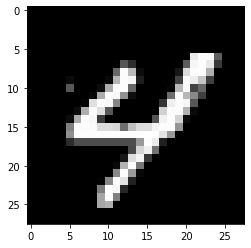

In [162]:
# Dataset is a tuple of image and the label
# indexing the dataset will show us that
# shape of the image is 1*28*28
# 28 * 28 are the pixel values ranging from values 0 to 1
# this image has a just one channel as it is  a gray scale image
img,label = dataset[89]
# permute makes the channel dimension as the last dimension as it helps to visualize the image using plt.imshow
img_viz = img.permute(1,2,0)
plt.imshow(img_viz, cmap = 'gray');


In [163]:
img_viz = img.permute(1,2,0)
print(img_viz.shape)
# plt.imshow(img_viz, cmap = 'gray');

torch.Size([28, 28, 1])


## Split Dataset - Training and Validation

In [164]:
#collapse-output
# Split the dataset into a training and the validation set
tr_data, val_data = random_split(dataset,[50000,10000])
len(tr_data), len(val_data)

(50000, 10000)

## Training and Validation Dataloader

In [165]:
# Create dataloaders
# Dataloader helps in converting the dataset into batches of data by describing the batch_size
tr_loader = DataLoader(tr_data,batch_size=200,shuffle=True)
val_loader = DataLoader(val_data,batch_size=200)

In [166]:
#collapse-output
# We can see that the data is a batch of 128 images and 120 labels
for data,label in tr_loader:
    print(data.shape)
    print(len(label))
    break

torch.Size([200, 1, 28, 28])
200


In [167]:
#collapse-output
# x@w.t()+ bias - Use the same equation
model = nn.Linear(in_features= 784,out_features=10)

# A model will randomly initialize the parameters(wt's and biases)
model.weight.shape, model.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

In [168]:
#collapse-output
for img,label in tr_loader:
    # shape of the batch in the beggining
    print(img.shape)
    #this functionality can be added inside the model in the forward method
    img = img.reshape(-1,28*28)
    # shape after reshaping into a vector of 784 elements
    print(img.shape)
    # applying the model to the reshaped img
    pred = model(img)
    print(model(img).shape)
    # As we can see that the model has outputted 10 probabilities which is a prob for all elements from 0-9
    break

torch.Size([200, 1, 28, 28])
torch.Size([200, 784])
torch.Size([200, 10])


In [169]:
#collapse-output
print(pred)
pred.shape

tensor([[-0.2481, -0.0215,  0.3545,  ...,  0.0965,  0.0290, -0.0884],
        [ 0.0309, -0.2940,  0.3338,  ..., -0.1401,  0.1159, -0.0594],
        [-0.1719, -0.2065,  0.3205,  ...,  0.0377, -0.2394, -0.2114],
        ...,
        [-0.1821,  0.5084,  0.5995,  ...,  0.0768, -0.3829, -0.1146],
        [ 0.1420, -0.0063,  0.0844,  ...,  0.0449, -0.1514, -0.3190],
        [-0.2699, -0.2119,  0.2204,  ...,  0.5135, -0.2199, -0.0297]],
       grad_fn=<AddmmBackward0>)


torch.Size([200, 10])

## Additional functionality to our NN model

To add additional functionality to the NN model we need to create a MnistModel class and inheret the nn.Module. 
Addiditional functionality in this is the step of reshaping the batch of data passing through the model to a vector of 784 pixels

In [170]:
# Add additional functionality to the NN model
# To add additional functionality to a NN model - which is the reshaping of a bunch of images - we have the use the concepts of OOP and inheritance. The forward method is the one that is applied to the bunch of images

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [171]:
# shape of wts and bias
model.linear.weight.shape, model.linear.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

## Softmax

Softmax converts a vector of K real numbers into a probability distribution of K possible outcomes

It is basically calculated by taking the exponent of preds and dividing by their sum to make sure its sum is 1


In [172]:
# We can see that the model from the above class works
for dta,label in tr_loader:
    pred = model(dta)
    print(pred.shape)
    print(label.shape)
    break

# We will apply softmax now - which converts the probability b/w 0 and 1 and the sum is 1
torch.sum(F.softmax(pred[0])).item()

# Applying softmax on the whole batch
pred_s = F.softmax(pred,dim=1)

# torch amx function gives us the index of the max probability as well as the probability
index_prob,prob = torch.max(pred_s,dim=1)

index_prob.shape,prob.shape

torch.Size([200, 10])
torch.Size([200])


/var/folders/j4/0sh22ln930vdhyh1wkttl89m0000gp/T/ipykernel_30681/3939508011.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.sum(F.softmax(pred[0])).item()


(torch.Size([200]), torch.Size([200]))

## Accuracy

The predictions are converted into probabilities and the highest probability is calculated using the max function

The index of the highest probability is then compared to the actual label and the accuracy % is calculated by divding the correct predictions with the total images


In [173]:
def metric_acc(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# We will get the same value even if we do not apply the softmax as
# e^x is an increasing function, i.e., if y1 > y2, then e^y1 > e^y2. The same holds after averaging out the values to get the softmax.
metric_acc(pred_s,label)


tensor(0.1050)

In [174]:
# cross entropy -ve log of predicted prob
# loss function will be cross_entropy
loss = F.cross_entropy(pred, label)
print(loss)

tensor(2.2892, grad_fn=<NllLossBackward0>)


## Model Training

This fit function is the training step. This training step invovles training the model on the training dataloader, calculating the loss, calculating the gradient for the
train loader and updating the weights and reseting the gradient at the end.

For the second part of the loop - we validate the model on the validation dataloader. The steps include calculating the loss and accuracy after each epoch and printing them at
the end. We can notice that the loss and the accuracy on the validation set improves after each epoch


In [175]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
def results_epoch(out_lst):
    val_loss_epoch = torch.stack([dct['val_loss'] for dct in out_lst]).mean()
    val_acc_epoch = torch.stack([dct['val_acc'] for dct in out_lst]).mean()
    return {'val_loss': val_loss_epoch.item(), 'val_acc': val_acc_epoch.item()}

def final_output(dct,epoch):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, dct['val_loss'], dct['val_acc']))
   
def validation(batch_val,model):
    img_val,label_val = batch_val
    pred_val = model(img_val)
    # loss is computed
    loss_val = F.cross_entropy(pred_val,label_val)
    # Accuracy is computed
    acc_val = metric_acc(pred_val,label_val)
    return {'val_loss': loss_val, 'val_acc': acc_val}
    
def check_scores(val_loader,model):
    out_lst = [validation(batch_val,model) for batch_val in val_loader]
    return results_epoch(out_lst)

def fit(epochs,learning_rate,model,train_loader,val_loader,opt_func=torch.optim.SGD):
    optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate , momentum=0.9)
    out_lst = []
    for epoch in range(epochs):
        
        # Training step on the training dataloader
        for batch in tr_loader:
            #extract batch of images and label
            img,label = batch
            #calculate prediction using the MNISTMODEL class initialized above
            pred = model(img)
            #Since this is a multi-label image classification model- the loss function is cross entropy
            loss = F.cross_entropy(pred,label)
            # In this step we calculate the gradient of the loss function with respect to the parameters or 784 pixels in this case
            loss.backward()
            # In this step we update the weights
            optimizer.step()
            # We make the gradient zero again so that now the gradients are not calculated untill the training is not done
            optimizer.zero_grad()
         
        # Validation on the validation dataloader   
        output = check_scores(val_loader,model)
        out_lst.append(output)
        final_output(output,epoch)
        
    return out_lst

In [176]:
model = MnistModel()
starting =  check_scores(val_loader,model)
print(starting)
out_lst = fit(20,learning_rate=0.002,model= model,train_loader = tr_loader,val_loader = val_loader)

{'val_loss': 2.3094968795776367, 'val_acc': 0.10899999737739563}
Epoch [0], val_loss: 0.8053, val_acc: 0.8323
Epoch [1], val_loss: 0.6180, val_acc: 0.8553
Epoch [2], val_loss: 0.5429, val_acc: 0.8651
Epoch [3], val_loss: 0.5003, val_acc: 0.8737
Epoch [4], val_loss: 0.4718, val_acc: 0.8784
Epoch [5], val_loss: 0.4517, val_acc: 0.8802
Epoch [6], val_loss: 0.4362, val_acc: 0.8818
Epoch [7], val_loss: 0.4241, val_acc: 0.8847
Epoch [8], val_loss: 0.4138, val_acc: 0.8873
Epoch [9], val_loss: 0.4054, val_acc: 0.8888
Epoch [10], val_loss: 0.3983, val_acc: 0.8905
Epoch [11], val_loss: 0.3922, val_acc: 0.8915
Epoch [12], val_loss: 0.3866, val_acc: 0.8925
Epoch [13], val_loss: 0.3814, val_acc: 0.8942
Epoch [14], val_loss: 0.3772, val_acc: 0.8945
Epoch [15], val_loss: 0.3733, val_acc: 0.8947
Epoch [16], val_loss: 0.3696, val_acc: 0.8968
Epoch [17], val_loss: 0.3666, val_acc: 0.8971
Epoch [18], val_loss: 0.3636, val_acc: 0.8972
Epoch [19], val_loss: 0.3605, val_acc: 0.8984


In [177]:
history = [starting] + out_lst
accuracies = [result['val_acc'] for result in history]
print(accuracies)

[0.10899999737739563, 0.8323000073432922, 0.8553000688552856, 0.8651000261306763, 0.8737000226974487, 0.8783999681472778, 0.8802000284194946, 0.8817999362945557, 0.8846999406814575, 0.8872999548912048, 0.8888000249862671, 0.8904999494552612, 0.8914999961853027, 0.892500102519989, 0.8941999673843384, 0.8945000171661377, 0.8947001099586487, 0.8968001008033752, 0.8970999717712402, 0.8972001075744629, 0.898400068283081]


## Visualization

This visualization shows us how much the model learns with each epoch


Text(0, 0.5, 'accuracy_on_the_validation_set')

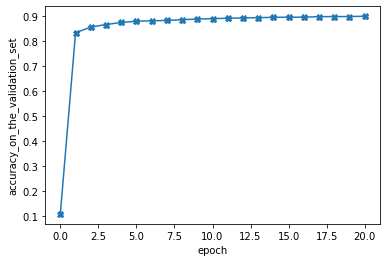

In [178]:
plt.plot(accuracies,'-X')
plt.xlabel('epoch')
plt.ylabel('accuracy_on_the_validation_set')

We can clearly see that with each epoch the loss and accuracies improve.
You can try to use different number of epochs and learning rate to see if you can improve the accuracy

## Testing on the test set

In [179]:
img_test = MNIST(root='Deep_Learning_Explorations/data/',train = False,transform=transforms.ToTensor())

## Prediction Function on the test set

In [180]:
def pred_function(img,model):
    img.shape
    inp = img.unsqueeze(0)
    out = model(inp)
    prob , preds = torch.max(out,dim=1)
    return preds[0].item()

Label: 3 , Predicted: 3


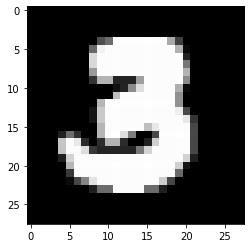

In [181]:
img, label = img_test[200]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', pred_function(img, model))

Label: 6 , Predicted: 6


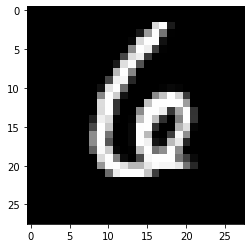

In [182]:
img, label = img_test[123]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', pred_function(img, model))

## Testing on all images - the test set

In [183]:
# define the test set
test_loader = DataLoader(img_test, batch_size=20)

In [184]:
# Accuracy and loss on the test data set
check_scores(test_loader,model)

{'val_loss': 0.3312353193759918, 'val_acc': 0.9093000292778015}

## Feed-Forward NN - Adding non-linearity to further improve the model

In [185]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 90)
        self.linear2 = nn.Linear(90,10)
        
    def forward(self, xb):
        xb =  xb.view(xb.size(0),-1)
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        return out
    
model = MnistModel()

In [186]:
# We can observe the weights and params of the different layers using the parameters method
# We can see the weights and params of the different layers below
for param in model.parameters():
    print(param.shape)

torch.Size([90, 784])
torch.Size([90])
torch.Size([10, 90])
torch.Size([10])


In [187]:
model.linear1.weight.shape,model.linear2.weight.shape

(torch.Size([90, 784]), torch.Size([10, 90]))

## Model Validation Feed-Forward Neural Network

We can observe that just by adding more linear layers and non-linearity to the model the accuracy of the model improves
on the training and the test set

images.shape: torch.Size([200, 1, 28, 28])


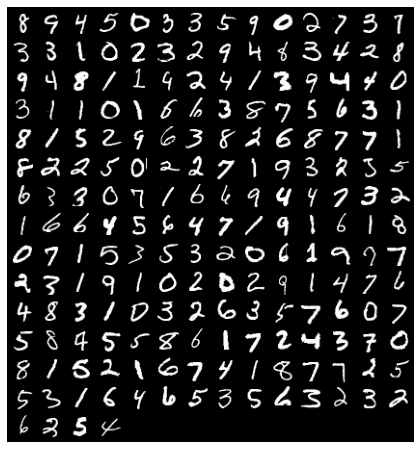

In [198]:
for images, _ in tr_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=14).permute((1, 2, 0)))
    break

In [188]:
model = MnistModel()
starting =  check_scores(val_loader,model)
print(starting)
out_lst = fit(20,learning_rate=0.002,model= model,train_loader = tr_loader,val_loader = val_loader)

{'val_loss': 2.2920496463775635, 'val_acc': 0.13729999959468842}
Epoch [0], val_loss: 1.0469, val_acc: 0.7977
Epoch [1], val_loss: 0.5957, val_acc: 0.8539
Epoch [2], val_loss: 0.4784, val_acc: 0.8716
Epoch [3], val_loss: 0.4247, val_acc: 0.8811
Epoch [4], val_loss: 0.3936, val_acc: 0.8874
Epoch [5], val_loss: 0.3723, val_acc: 0.8913
Epoch [6], val_loss: 0.3566, val_acc: 0.8956
Epoch [7], val_loss: 0.3426, val_acc: 0.8996
Epoch [8], val_loss: 0.3320, val_acc: 0.9033
Epoch [9], val_loss: 0.3237, val_acc: 0.9055
Epoch [10], val_loss: 0.3146, val_acc: 0.9080
Epoch [11], val_loss: 0.3078, val_acc: 0.9108
Epoch [12], val_loss: 0.3003, val_acc: 0.9131
Epoch [13], val_loss: 0.2949, val_acc: 0.9140
Epoch [14], val_loss: 0.2899, val_acc: 0.9166
Epoch [15], val_loss: 0.2838, val_acc: 0.9164
Epoch [16], val_loss: 0.2783, val_acc: 0.9198
Epoch [17], val_loss: 0.2733, val_acc: 0.9207
Epoch [18], val_loss: 0.2682, val_acc: 0.9225
Epoch [19], val_loss: 0.2638, val_acc: 0.9239


Result on the test set

In [190]:
check_scores(test_loader,model)

{'val_loss': 0.2418811321258545, 'val_acc': 0.9318000078201294}